In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import datetime
from zoneinfo import ZoneInfo

from libra_toolbox.neutron_detection.activation_foils import naa

In [2]:
run_dir = '.'
directories = {}
directories['Na22_1']  = f'{run_dir}/Na22_5uCi_Mar2014_20241107/UNFILTERED'
directories['Na22_2']  = f'{run_dir}/Na22_7_33uCi_2May2016_20241121/UNFILTERED'
directories['Na22_3']  = f'{run_dir}/Na22_9_98uCi_29Sep2023_20241121/UNFILTERED'
directories['Cs137_1'] = f'{run_dir}/Cs137_4_66uCi_19Mar2014_20241107/UNFILTERED'
directories['Cs137_2'] = f'{run_dir}/Cs137_5_0uCi_Jan2006_20241121/UNFILTERED'
directories['Cs137_3'] = f'{run_dir}/Cs137_9_38uCi_29Sep2023_20241121/UNFILTERED'
directories['Co60_1']  = f'{run_dir}/Co60_0_872uCi_19Mar14_20241107/UNFILTERED'
directories['Co60_2']  = f'{run_dir}/Co60_1_0uCi_Feb2006_20241121/UNFILTERED'
directories['Co60_3']  = f'{run_dir}/Co60_1_0uCi_Jan2006_20241121/UNFILTERED'
directories['Mn54']  = f'{run_dir}/Mn54_6_27uCi_2May2016_20241107/UNFILTERED'
directories['Ba133'] = f'{run_dir}/Ba133_1uCi_Mar14_20241107/UNFILTERED'

directories['Zirconium'] = f'{run_dir}/Zirconium_20241104_2324/UNFILTERED'
directories['Niobium'] = f'{run_dir}/Niobium_20241107_1628/UNFILTERED'
directories['Background'] = f'{run_dir}/Background_20241108_0027/UNFILTERED'

In [3]:
# decay_lines = {'Ba133':{'energy':[80.9979, 276.3989, 302.8508, 356.0129, 383.8485],
#                          'intensity':[0.329, 0.0716, 0.1834, 0.6205, 0.0894],
#                          'half_life':[10.551*365.25*24*3600]},
#                 'Co60':{'energy':[1173.228, 1332.492],
#                         'intensity':[0.9985, 0.999826],
#                         'half_life':[1925.28*24*3600]},
#                 'Na22':{'energy':[511, 1274.537],
#                         'intensity':[1.80, 0.9994],
#                         'half_life':[2.6018*365.25*24*3600]},
#                 'Cs137':{'energy':[661.657],
#                          'intensity':[0.851],
#                          'half_life':[30.08*365.25*24*3600]},
#                 'Mn54':{'energy':[834.848],
#                         'intensity':[0.99976],
#                         'half_life':[312.20*24*3600]}}
decay_lines = {
                # 'Ba133':{'energy':[356.0129],
                #          'intensity':[0.6205],
                #          'half_life':[10.551*365.25*24*3600],
                #          'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':1 * 3.7e4},
                'Co60_1':{'energy':[1173.228, 1332.492],
                        'intensity':[0.9985, 0.999826],
                        'half_life':[1925.28*24*3600],
                        'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':0.872 * 3.7e4},
                # 'Zirconium':{'energy':[909.15], 
                #              'intensity':[0.9904],
                #              'half_life':[78.41 * 3600]},
                # 'Co60_2':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 2, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                # 'Co60_3':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                'Na22_1':{'energy':[511, 1274.537],
                        'intensity':[1.80, 0.899],
                        'half_life':[2.6018*365.25*24*3600],
                        'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity': 5 * 3.7e4},
                # 'Na22_2':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 7.33 * 3.7e4},
                # 'Na22_3':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 9.98 * 3.7e4},
                'Cs137_1':{'energy':[661.657],
                         'intensity':[0.851],
                         'half_life':[30.08*365.25*24*3600],
                         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                         'activity':4.66 * 3.7e4},
                # 'Cs137_2':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':5.0 * 3.7e4},
                # 'Cs137_3':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':9.38 * 3.7e4},
                'Mn54':{'energy':[834.848],
                        'intensity':[0.99976],
                        'half_life':[312.20*24*3600],
                        'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':6.27 * 3.7e4}}

In [4]:
counts = naa.get_compass_counts(directories, savefile=f'{run_dir}/counts.pkl')

In [5]:
counts = naa.subtract_background(counts, directories['Background'], savefile=f'{run_dir}/counts_bkg_sub.pkl')

In [6]:
default_peak_inputs = {'Na22':{'height_factor':0.01, 'prom_factor':0.01, 'width':[10, 200], 'start_index':100},
               'Cs137':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Co60':{'height_factor':0.6,'prom_factor':0.2, 'width':[20, 200], 'start_index':400},
               'Mn54':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Ba133':{'height_factor':0.01,'prom_factor':0.1, 'width':[10, 200], 'start_index':100},
               'Zirconium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 100], 'start_index':100},
               'Niobium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Background':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100}}
peak_inputs = {}
peak_input_keys = default_peak_inputs.keys()
for sample in counts.keys():
    for pikey in peak_input_keys:
        if pikey in sample:
            peak_inputs[sample] = default_peak_inputs[pikey]
print(peak_inputs)

    


{'Na22_1': {'height_factor': 0.01, 'prom_factor': 0.01, 'width': [10, 200], 'start_index': 100}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Zirconium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 100], 'start_index': 100}, 'Niobium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Background': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}}


# NaI Detector Energy Calibration

Na22_1 1 [635, 1497]
Na22_1 2 [731, 1728]
Cs137_1 1 [802]
Cs137_1 2 [926]
Co60_1 1 [1390 1576]
Co60_1 2 [1598 1797]
Mn54 1 [994]
Mn54 2 [1151]
Zirconium 1 [ 346  640 1092]
Zirconium 2 [ 329  721 1248]
Niobium 1 [1119]
Niobium 2 [1289]
Background 1 []


/var/folders/8l/th_q6c756gb0yy2fvkvdjntr0000gn/T/ipykernel_89344/2609114881.py:17: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[i].set_ylim(-y_max*0.25, y_max*1.5)


Background 2 []


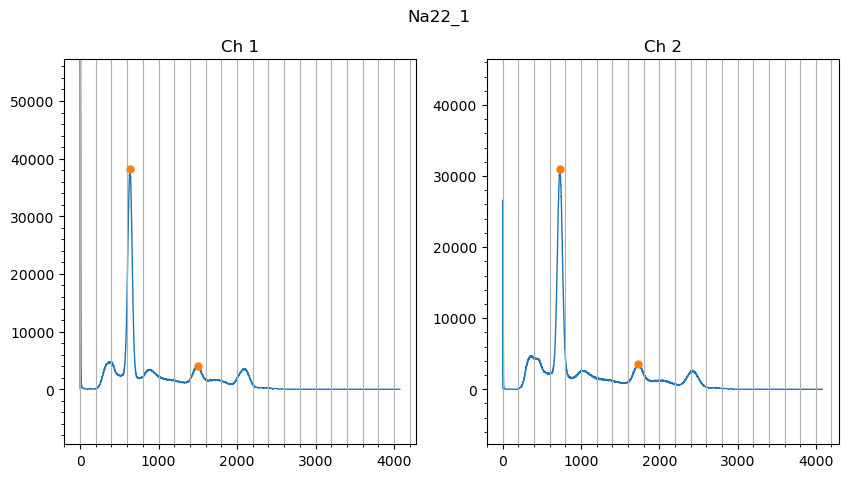

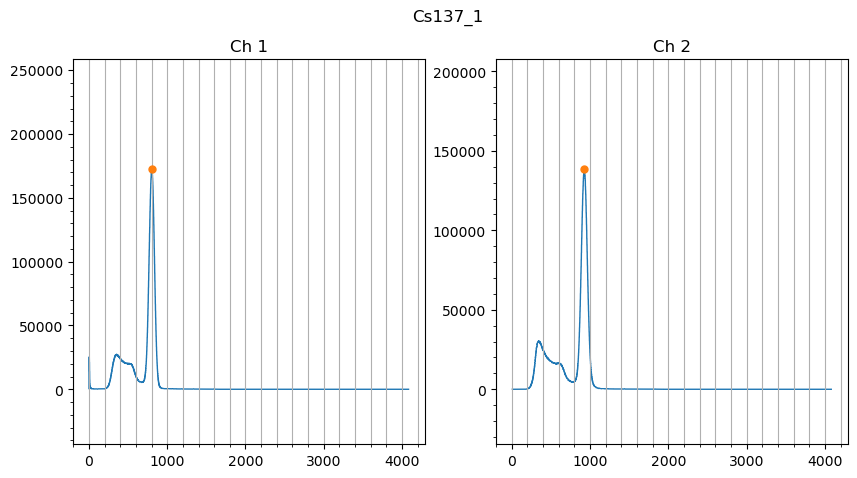

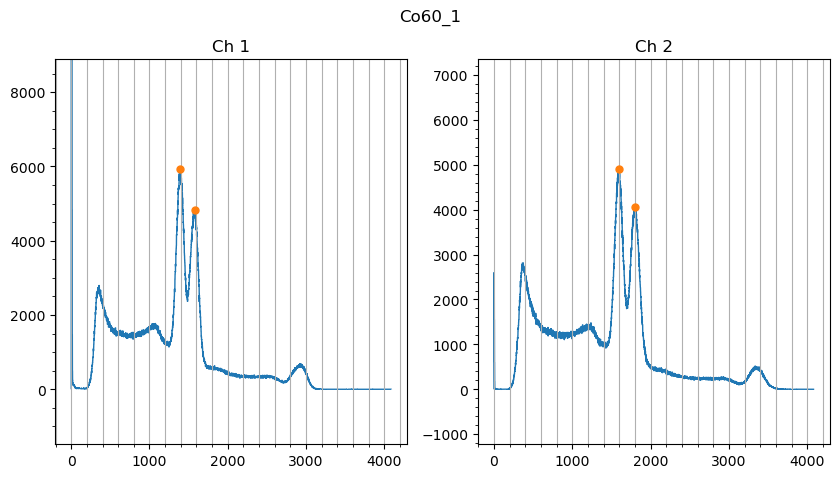

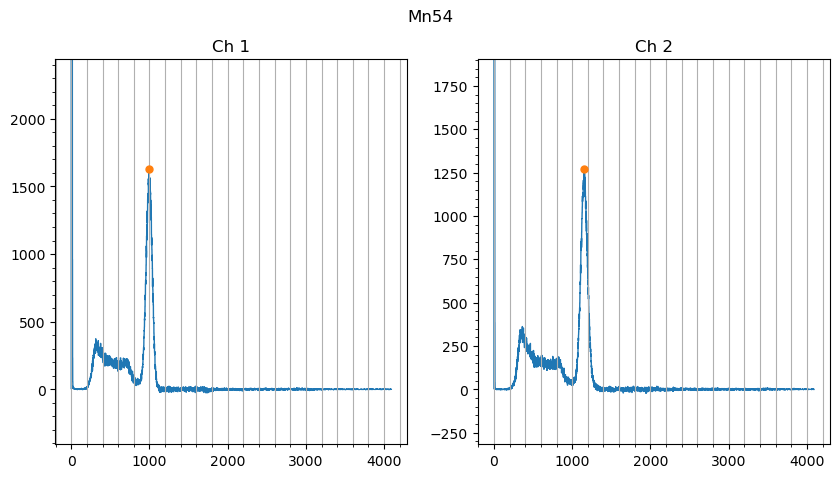

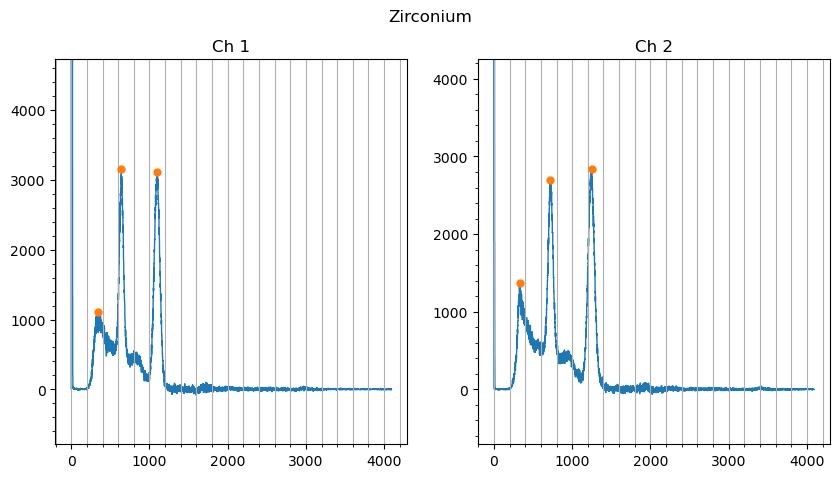

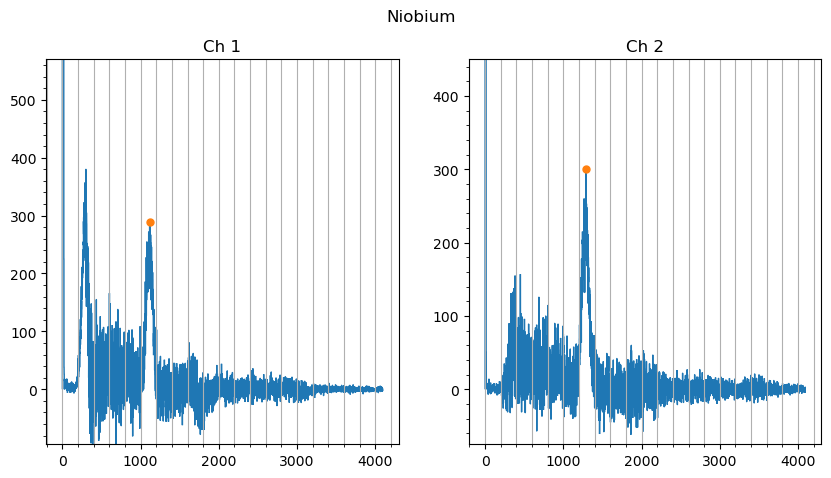

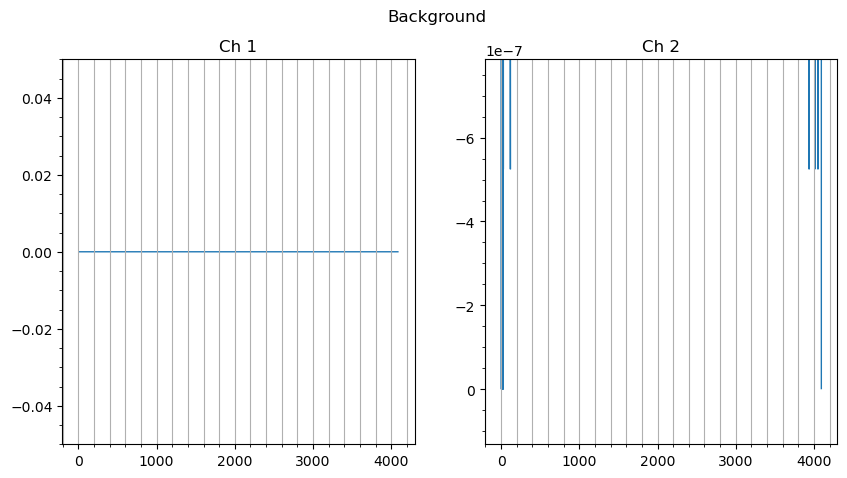

In [7]:

for sample in counts.keys():
    fig, ax = plt.subplots(nrows=1, ncols=len(counts[sample].keys()), figsize=[10, 5])
    for i,ch in enumerate(counts[sample].keys()):
        # peaks, peak_data = find_peaks(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:],
        #                               height=peak_inputs[sample]['height_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               prominence=peak_inputs[sample]['prom_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               width=peak_inputs[sample]['width'])
        peaks = naa.get_peaks(counts[sample][ch]['hist'], sample)
        print(sample, ch, peaks)
        ax[i].stairs(counts[sample][ch]['hist'], counts[sample][ch]['bin_edges'])
        ax[i].plot(peaks, counts[sample][ch]['hist'][peaks], '.', ms=10)
        ax[i].set_title('Ch {}'.format(ch))
        # ax[i].set_yscale('log')
        ax[i].minorticks_on()
        ax[i].xaxis.grid(which='both')
        y_max = np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:])
        ax[i].set_ylim(-y_max*0.25, y_max*1.5)
        if sample=='Co60_3' and ch==2:
            ax[i].set_xlim(1500, 2100)
    fig.suptitle(sample)

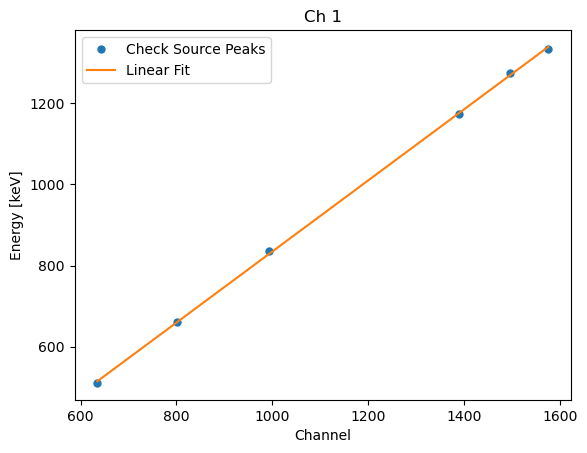

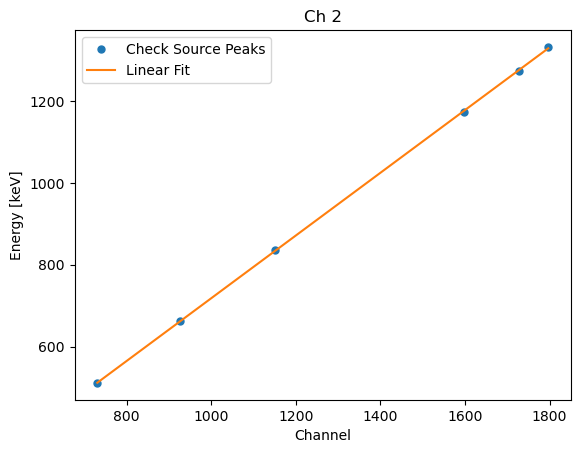

In [8]:
counts, coeff = naa.calibrate_counts(counts, peak_inputs=peak_inputs, decay_lines=decay_lines, plot_calibration=True)

# NaI Detector Efficiency Measurement

In [9]:
# decay_lines['Ba133']['energy'] = [276.3989, 302.8508, 356.0129, 383.8485]
# decay_lines['Ba133']['intensity'] = [0.0716, 0.1834, 0.6205, 0.0894]


# for source in decay_lines.keys():
#     for ch in counts[source].keys():
#         print(source, ch, decay_lines[source]['energy'])
#         naa.get_peak_areas(counts[source][ch]['hist'],
#                             counts[source][ch]['calibrated_bin_edges'],
#                             decay_lines[source]['energy'],
#                             overlap_width=200,
#                             search_width=300,
#                             plot=True)
#         if source=='Zirconium':
#             plt.title('Zirconium Foil Gamma Spectrum')
#             plt.xlim(0, 1500)

In [10]:
for source in counts.keys():
    for ch in counts[source].keys():
        print(source, ' Ch ', ch, ' Dead Time: ', (counts[source][ch]['live_count_time']
                                                   / counts[source][ch]['real_count_time']))

Na22_1  Ch  1  Dead Time:  0.8956648543909121
Na22_1  Ch  2  Dead Time:  0.9916233573823324
Cs137_1  Ch  1  Dead Time:  0.9338852201965263
Cs137_1  Ch  2  Dead Time:  0.9547759375994587
Co60_1  Ch  1  Dead Time:  0.898008905597995
Co60_1  Ch  2  Dead Time:  0.995851608918041
Mn54  Ch  1  Dead Time:  0.7769391512964822
Mn54  Ch  2  Dead Time:  0.9995907471243073
Zirconium  Ch  1  Dead Time:  0.9279200536245746
Zirconium  Ch  2  Dead Time:  0.9999257256466465
Niobium  Ch  1  Dead Time:  0.8248312439052493
Niobium  Ch  2  Dead Time:  0.999753680737637
Background  Ch  1  Dead Time:  0.9860629271524285
Background  Ch  2  Dead Time:  0.9999299996791651


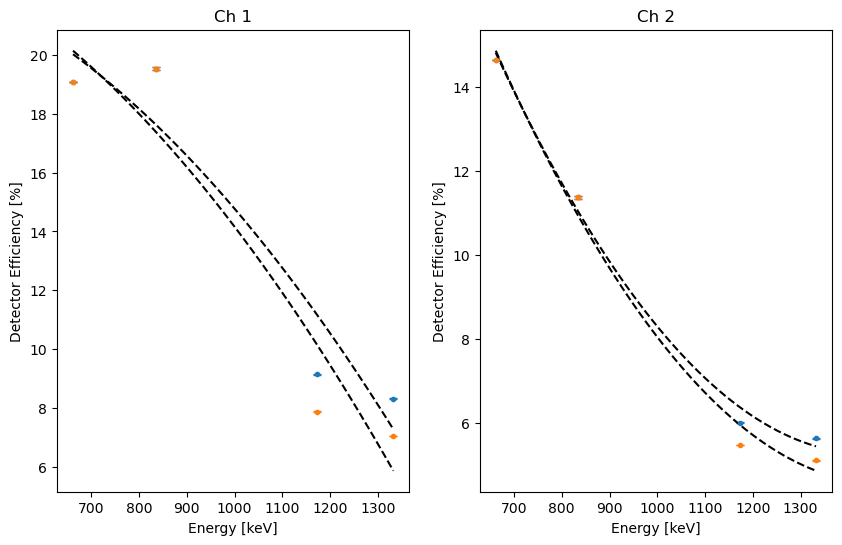

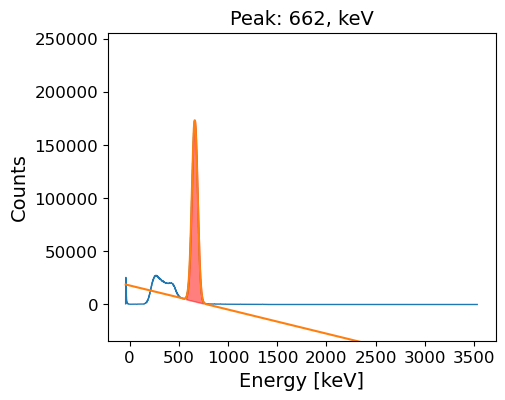

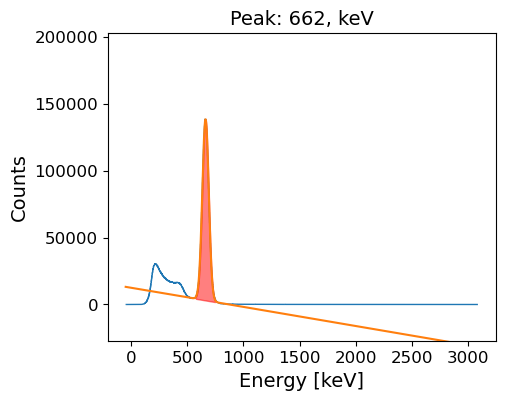

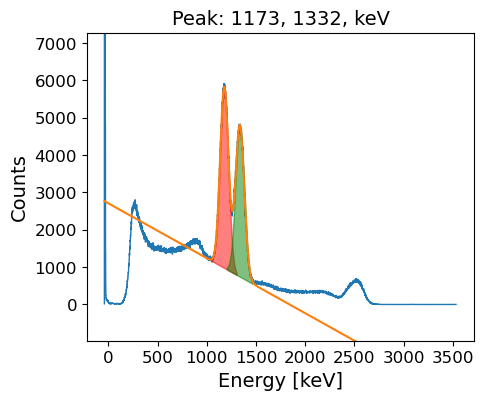

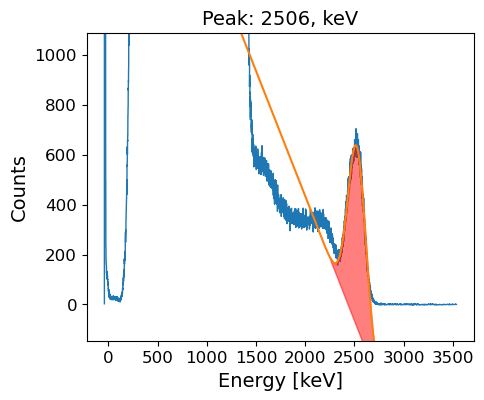

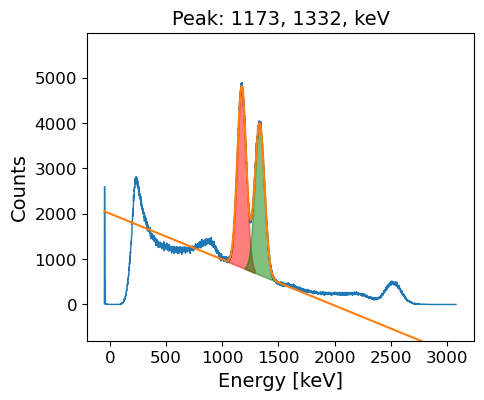

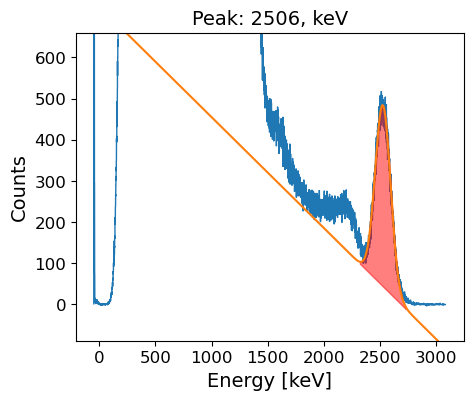

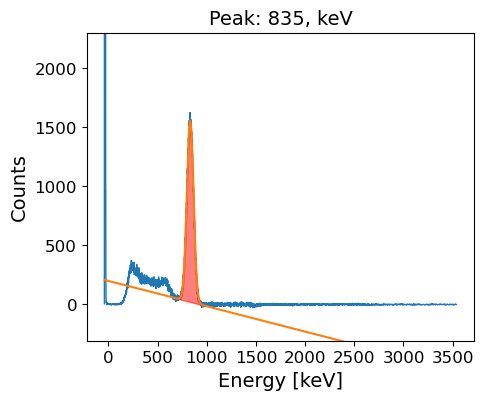

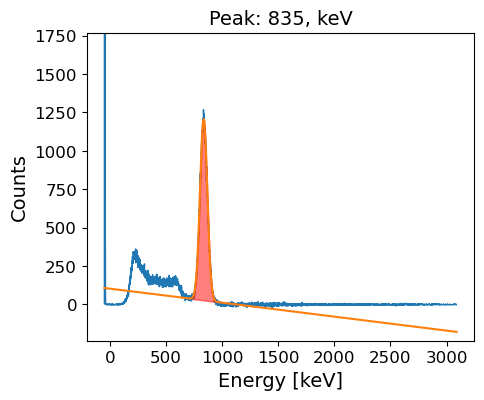

In [11]:
nuclides = [ 'Cs137_1',
             'Co60_1', 
            'Mn54']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,6])
effs, eff_errs, eff_coeff, bounds = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=True,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=True, ax_eff=ax)
effs, eff_errs, eff_coeff, bounds = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=False,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=False, ax_eff=ax)

Text(0.5, 1.0, 'Niobium Ch 1')

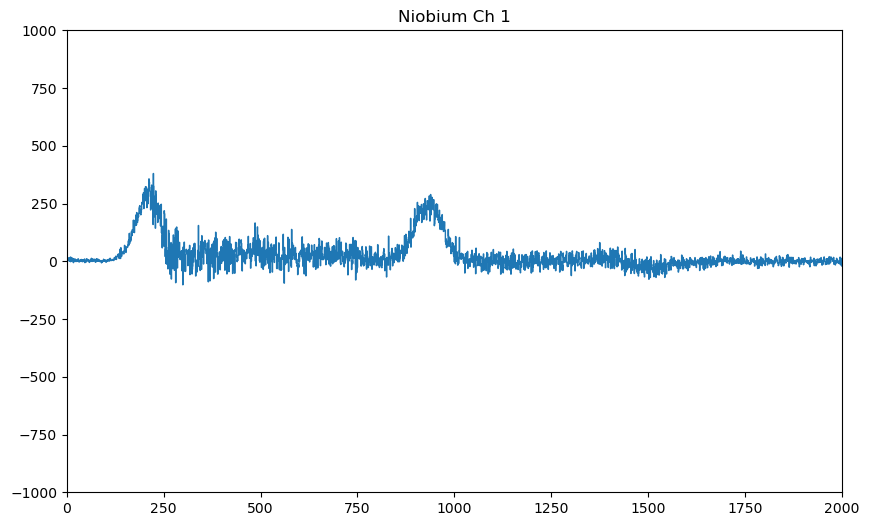

In [12]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Niobium'][1]['hist'], counts['Niobium'][1]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 1e3)
ax.set_title('Niobium Ch 1')


Text(0.5, 1.0, 'Zirconium Ch 1')

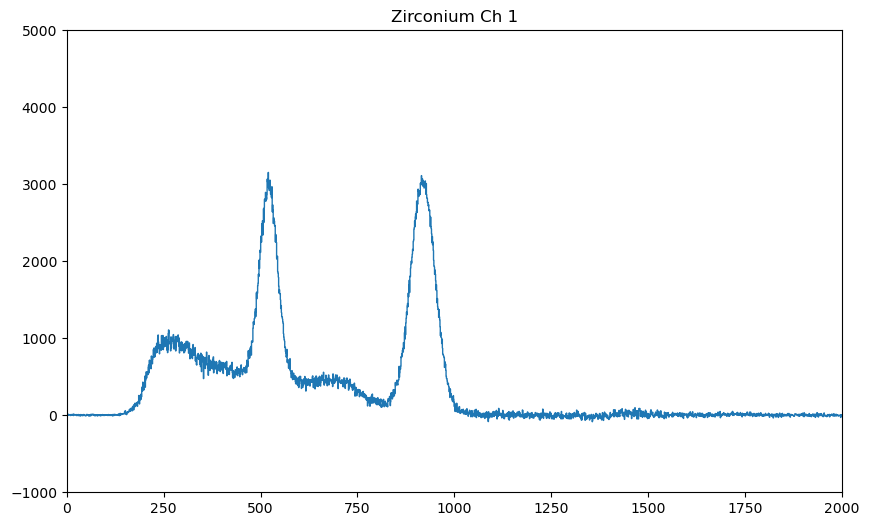

In [13]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Zirconium'][1]['hist'], counts['Zirconium'][1]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 5e3)
ax.set_title('Zirconium Ch 1')

# Nioboum Foil A325 Rate Measurement

Efficiency calculation based on Equation 1 from:

Lee, Dongwon, et al. "Determination of the Deuterium-Tritium (D-T) Generator Neutron Flux using Multi-foil Neutron Activation Analysis Method." , May. 2019. https://doi.org/10.2172/1524045

In [14]:
from libra_toolbox.neutron_detection.activation_foils import *
from libra_toolbox.neutron_detection.activation_foils.settings import ureg

In [15]:
nb = foils.Niobium(mass=0.2733 * settings.ureg.g,
                   thickness=0.01 * settings.ureg.inch,
                   name='Nb1')

flux = {}
mean_flux = 0 / ureg.s

for ch in counts['Niobium'].keys():
        experiment = foils.Experiment(time_generator_off="11/04/2024 22:14:00",
                                      start_time_counting=counts['Niobium'][ch]['start_time'],
                                      distance_from_center_of_target_plane=5.08 * ureg.cm,
                                      real_count_time=counts['Niobium'][ch]['real_count_time'] * ureg.second,
                                      live_count_time=counts['Niobium'][ch]['live_count_time'] * ureg.second,
                                      generator= "A325",
                                      run=1)
        irradiations = [
        {"t_on": 0, "t_off": 12 * ureg.h}
        ]
        experiment.total_eff_coeff = eff_coeff[ch]
        experiment.efficiency_bounds= np.array(bounds[ch]) * ureg.keV
        experiment.photon_counts = naa.get_peak_areas(counts['Niobium'][ch]['hist'],
                                                         counts['Niobium'][ch]['calibrated_bin_edges'],
                                                         nb.photon_energies.magnitude,
                                                         plot=False) * ureg.count
        experiment.photon_counts_err = np.sqrt(experiment.photon_counts) * ureg.count
        flux[ch] = explicit.get_neutron_flux(experiment, irradiations, nb)[0]
        print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
        mean_flux += flux[ch] / len(counts['Niobium'].keys())

print('Mean Flux: {:.3e}'.format(mean_flux))

Ch 1 Flux: 8.409e+07 / second

Ch 2 Flux: 1.044e+08 / second

Mean Flux: 9.426e+07 / second


# Zirconium Foil A325 Rate Measurement

THE FIRST VALUE IN THE MEAN FLUX VECTOR (USING 511 keV PEAK) IS **EXTRAPOLATING** UNLESS THE Na-22 SOURCE IS ADDED TO THE EFFICIENCY CALCULATION.

In [16]:
zr = foils.Zirconium(mass=0.9036 * ureg.g,
                     thickness=0.005 * 8 * ureg.inch,
                     name='Zr1')

flux = {}
mean_flux = 0 / ureg.s

for ch in counts['Zirconium'].keys():
        experiment = foils.Experiment(time_generator_off="11/04/2024 22:14:00",
                                      start_time_counting=counts['Zirconium'][ch]['start_time'],
                                      distance_from_center_of_target_plane=5.08 * ureg.cm,
                                      real_count_time=counts['Zirconium'][ch]['real_count_time'] * ureg.second,
                                      live_count_time=counts['Zirconium'][ch]['live_count_time'] * ureg.second,
                                      generator= "A325",
                                      run=1)
        irradiations = [
        {"t_on": 0, "t_off": 12 * ureg.h}
        ]
        experiment.total_eff_coeff = eff_coeff[ch]
        experiment.efficiency_bounds= np.array(bounds[ch]) * ureg.keV
        experiment.photon_counts = naa.get_peak_areas(counts['Zirconium'][ch]['hist'],
                                                         counts['Zirconium'][ch]['calibrated_bin_edges'],
                                                         zr.photon_energies.magnitude,
                                                         plot=False) * ureg.count
        print('Photon energies: ', zr.photon_energies)
        experiment.photon_counts_uncertainty = np.sqrt(experiment.photon_counts) * ureg.count
        flux[ch] = explicit.get_neutron_flux(experiment, irradiations, zr)
        for i,peak in enumerate(zr.photon_energies):
             print('Ch {} flux as measured from {} peak:\n\t{:.3e} {}\n'.format(ch,
                                                                              peak,
                                                                              flux[ch][i].magnitude,
                                                                              flux[ch][i].units))
        mean_flux += flux[ch] / len(counts['Zirconium'].keys())

print('Mean Flux: {:.3e}'.format(mean_flux))

Photon energies:  [511.0 909.15] kiloelectron_volt
Ch 1 flux as measured from 511.0 kiloelectron_volt peak:
	8.116e+07 1 / second

Ch 1 flux as measured from 909.15 kiloelectron_volt peak:
	8.370e+07 1 / second

Photon energies:  [511.0 909.15] kiloelectron_volt
Ch 2 flux as measured from 511.0 kiloelectron_volt peak:
	7.888e+07 1 / second

Ch 2 flux as measured from 909.15 kiloelectron_volt peak:
	1.164e+08 1 / second

Mean Flux: [8.002e+07 1.001e+08] / second


/Users/collin/anaconda3/envs/libra/lib/python3.12/site-packages/libra_toolbox/neutron_detection/activation_foils/explicit.py:54: UserWarning: Efficiency is being extrapolated according to efficiency fit curve bounds.
  warnings.warn('Efficiency is being extrapolated according to efficiency fit curve bounds.')
